# Task 1

Correlation between odd and even pixels: 0.9578957754952948


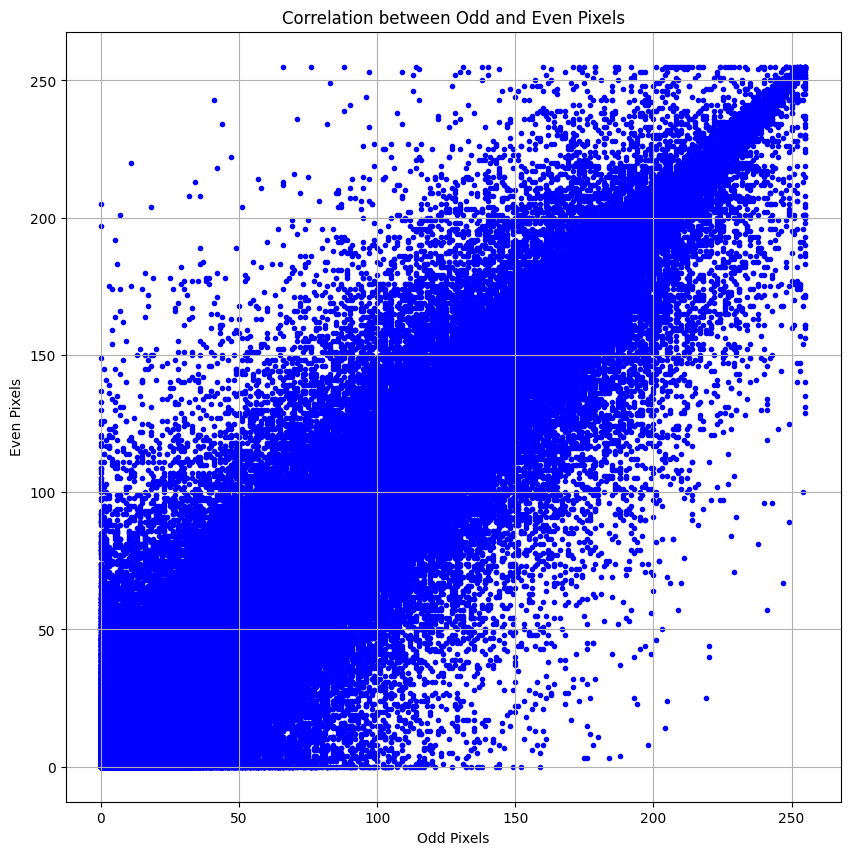

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Load the image using OpenCV
image_path = os.path.join("assets", "pic2.jpg")
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Make sure the image dimensions are even to avoid dimension mismatch
# Get the dimensions of the image
rows, cols = img.shape

# Ensure even dimensions
if rows % 2 != 0:
    rows -= 1
if cols % 2 != 0:
    cols -= 1

# Crop the image to the adjusted dimensions
img = img[:rows, :cols]


def extract_even_odd_pixels(image_np):
    # Separate the even and odd indexed pixels
    even_pixels = []
    odd_pixels = []

    for i in range(image_np.shape[0]):
        for j in range(image_np.shape[1]):
            if (i % 2 == 0) and (j % 2 == 0):
                even_pixels.append(image_np[i, j])
            elif (i % 2 == 1) and (j % 2 == 1):
                odd_pixels.append(image_np[i, j])
                
    return np.array(even_pixels), np.array(odd_pixels)

# Extract odd and even pixels
even_pixels, odd_pixels = extract_even_odd_pixels(img)

# Resize the arrays to ensure they have the same size
min_len = min(len(odd_pixels), len(even_pixels))
odd_pixels = odd_pixels[:min_len]
even_pixels = even_pixels[:min_len]

# Compute the correlation between odd and even pixels
correlation = np.corrcoef(odd_pixels, even_pixels)[0, 1]
print("Correlation between odd and even pixels:", correlation)

# Plot the correlation
plt.figure(figsize=(10, 10))
plt.scatter(odd_pixels, even_pixels, color='b', marker='.')
plt.title('Correlation between Odd and Even Pixels')
plt.xlabel('Odd Pixels')
plt.ylabel('Even Pixels')
plt.grid(True)
plt.show()


# Task 2

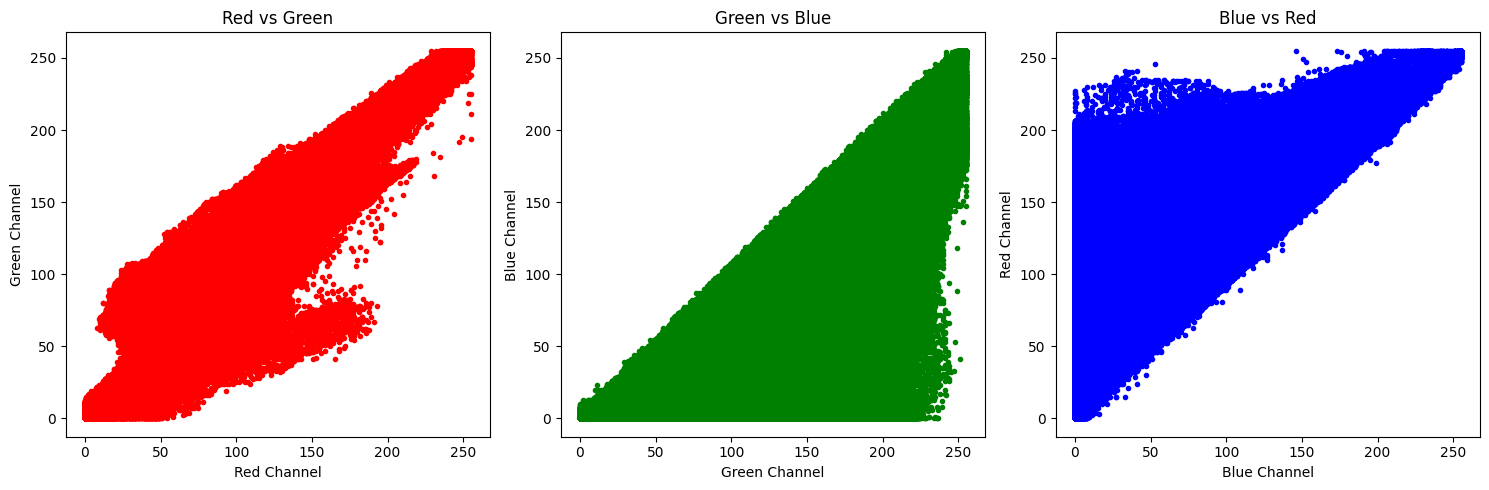

In [8]:
def spectral_correlation(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    
    # Extract RGB channels
    red_channel = img[:,:,2].flatten()
    green_channel = img[:,:,1].flatten()
    blue_channel = img[:,:,0].flatten()
    
    return red_channel, green_channel, blue_channel

def plot_spectral_correlation(red_channel, green_channel, blue_channel):
    plt.figure(figsize=(15, 5))

    # Red vs Green
    plt.subplot(1, 3, 1)
    plt.scatter(red_channel, green_channel, color='r', marker='.')
    plt.xlabel('Red Channel')
    plt.ylabel('Green Channel')
    plt.title('Red vs Green')

    # Green vs Blue
    plt.subplot(1, 3, 2)
    plt.scatter(green_channel, blue_channel, color='g', marker='.')
    plt.xlabel('Green Channel')
    plt.ylabel('Blue Channel')
    plt.title('Green vs Blue')

    # Blue vs Red
    plt.subplot(1, 3, 3)
    plt.scatter(blue_channel, red_channel, color='b', marker='.')
    plt.xlabel('Blue Channel')
    plt.ylabel('Red Channel')
    plt.title('Blue vs Red')

    plt.tight_layout()
    plt.show()

# Example usage
# image_path = "path_to_your_image.jpg"
red_channel, green_channel, blue_channel = spectral_correlation(image_path)
plot_spectral_correlation(red_channel, green_channel, blue_channel)
